In [182]:
#Import the SQL database into Pandas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy_utils import database_exists, create_database
from local_settings import postgresql as settings


In [183]:
#If using a password, do not upload your password 
def get_engine(user, passwd, host, port, db):
    url = f"postgresql://{user}:{passwd}@{host}:{port}/{db}"
    if not database_exists(url):
        create_database(url)
    engine = create_engine(url, pool_size=50, echo=False)
    return engine

In [184]:
engine = get_engine(settings['pguser'],
          settings['pgpasswd'],
          settings['pghost'],
          settings['Port'],
          settings['pgdb'])

In [185]:
engine.url.database

'SQL_challenge'

In [186]:
def get_engine_from_settings():
    keys = ['pguser','pgpasswd','pghost','Port','pgdb']
    if not all(key in keys for key in settings.keys()):
        raise Exception('Bad config file')
        
    return get_engine(settings['pguser'],
                      settings['pgpasswd'],
                      settings['pghost'],
                      settings['Port'],
                      settings['pgdb'])


In [187]:
def get_session():
    engine = get_engine_from_settings()
    session = sessionmaker(bind=engine)()
    return session


In [188]:
session = get_session()

In [189]:
session.close()

In [190]:
engine = session.get_bind()
engine.dispose()

In [191]:
conn = engine.connect()


In [192]:
#Get data from employees table
data_emp=pd.read_sql("SELECT*FROM employees", conn)
data_emp.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302.0,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053.0,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444.0,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786.0,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238.0,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [193]:
data_empl=data_emp.rename(columns={'emp_title_id':'title_id'})
data_empl.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302.0,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053.0,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444.0,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786.0,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238.0,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [194]:
data_emp.to_csv("../output/employees.csv")  


In [195]:
#get data basic information
data_salary=pd.read_sql("SELECT*FROM salaries", conn)
data_salary.head()

,emp_no,salary
0,10001.0,60117.0
1,10002.0,65828.0
2,10003.0,40006.0
3,10004.0,40054.0
4,10005.0,78228.0


In [196]:
data_basic.to_csv("../output/salaries.csv")  


In [197]:
data_title=pd.read_sql("SELECT*FROM titles", conn)


In [198]:
data_title.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [199]:
#get data from department_info
data_dept=pd.read_sql("SELECT*FROM department_info", conn)

In [200]:
data_dept.head()

,dept_name,dept_no,emp_no
0,Development,d005,10001.0
1,Sales,d007,10002.0
2,Production,d004,10003.0
3,Production,d004,10004.0
4,Human Resources,d003,10005.0


In [201]:
data_dept.to_csv("../output/dept_names.csv")  


In [202]:
#merge Data Frames data_basic and data_dept to view departments
data_merge=pd.merge(data_empl,data_title, how="inner")
data_merge_salary=pd.merge(data_merge,data_salary, how="outer")
data_merge_salary.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302.0,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000.0
1,421786.0,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000.0
2,273487.0,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087.0
3,246449.0,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084.0
4,48085.0,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016.0


In [203]:
data_employees=pd.merge(data_merge_salary,data_dept, how="outer")
data_employees.head()

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary,dept_name,dept_no
0,473302.0,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff,40000.0,Finance,d002
1,421786.0,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff,40000.0,Human Resources,d003
2,273487.0,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff,56087.0,Human Resources,d003
3,246449.0,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff,87084.0,Sales,d007
4,48085.0,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff,63016.0,Finance,d002


In [204]:
data_employees=data_employees[['emp_no','birth_date','first_name','last_name','title','dept_name','salary']]
data_employees.head()

,emp_no,birth_date,first_name,last_name,title,dept_name,salary
0,473302.0,1953-07-25,Hideyuki,Zallocco,Staff,Finance,40000.0
1,421786.0,1957-09-28,Xiong,Verhoeff,Staff,Human Resources,40000.0
2,273487.0,1957-04-14,Christoph,Parfitt,Staff,Human Resources,56087.0
3,246449.0,1958-03-23,Subbu,Bultermann,Staff,Sales,87084.0
4,48085.0,1964-01-19,Venkatesan,Gilg,Staff,Finance,63016.0


In [205]:
salary_plot=data_employees['salary'].value_counts()
salary_plot.head()

40000.0    105316
44564.0        21
55581.0        21
53078.0        20
45050.0        20
Name: salary, dtype: int64

In [206]:
salary_plot_df=pd.DataFrame(salary_plot).head(10)
salary_plot_df.head()

,salary
40000.0,105316
44564.0,21
55581.0,21
53078.0,20
45050.0,20


In [207]:
salary_plot_df=pd.DataFrame(salary_plot)
salary_reset=salary_plot_df.reset_index().rename(columns={"":"salary", "salary":"counts"}).head(10)
salary_rename=salary_reset.rename(columns={"index":"salary"})
salary_rename.head()

,salary,counts
0,40000.0,105316
1,44564.0,21
2,55581.0,21
3,53078.0,20
4,45050.0,20


In [208]:
percentage = []
for i in range(salary_rename.shape[0]):
    pct = (salary_rename.counts[i] / 105493.0) * 100
    percentage.append(round(pct,2))
salary_rename['Percentage %'] = percentage
salary_rename

,salary,counts,Percentage %
0,40000.0,105316,99.83
1,44564.0,21,0.02
2,55581.0,21,0.02
3,53078.0,20,0.02
4,45050.0,20,0.02
5,47454.0,19,0.02
6,41767.0,19,0.02
7,42088.0,19,0.02
8,53783.0,19,0.02
9,49416.0,19,0.02


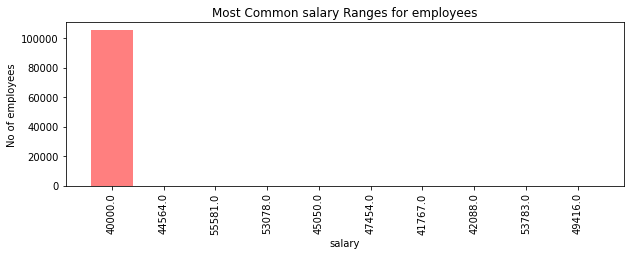

In [209]:
#histogram to visualize the most common salary ranges for employees.
x_axis = np.arange(len(salary_rename))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, salary_rename['counts'], color='r', alpha=0.5, align="center")
plt.title("Most Common salary Ranges for employees")
plt.xticks(tick_locations, salary_rename["salary"], rotation="vertical")
plt.xlabel("salary")
plt.ylabel("No of employees")
plt.show()

In [210]:
#Create a bar chart of average salary by title.
title_bar=round(data_employees.groupby('title').mean(),2)
title_reset= title_bar.reset_index()
title_reset_df=title_reset[["title","salary"]]
title_reset_df

,title,salary
0,Assistant Engineer,48615.07
1,Engineer,48533.34
2,Manager,51531.04
3,Senior Engineer,48505.71
4,Senior Staff,58557.39
5,Staff,58460.05
6,Technique Leader,48574.32


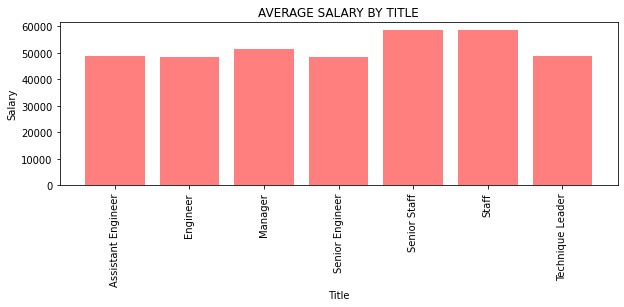

In [211]:
x_axis = np.arange(len(title_reset_df))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,3))
plt.bar(x_axis, title_reset_df['salary'], color='r', alpha=0.5, align="center")
plt.title("AVERAGE SALARY BY TITLE")
plt.xticks(tick_locations, title_reset_df["title"], rotation="vertical")
plt.xlabel("Title")
plt.ylabel("Salary")
plt.show()